# Regression Analysis: Simple Linear Regression

Simple Linear Regression is a statistical method used to model the relationship between a scalar response variable and one explanatory variable by fitting a linear equation to observed data. The key idea is to find the linear relationship that best explains the variability in the dependent variable based on the variability in the independent variable.

#### Mathematical Formula and Approach

The equation of a simple linear regression line is:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

where:
- $y$ is the dependent variable (response),
- $x$ is the independent variable (predictor),
- $\beta_0$ is the intercept of the regression line,
- $\beta_1$ is the slope of the regression line,
- $\epsilon$ is the error term.

#### Steps for Conducting Simple Linear Regression

1. **Choose Variables:** Identify the dependent variable ($y$) and the independent variable ($x$).
2. **Estimate Coefficients:** Use the Least Squares method to estimate the coefficients $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals.
3. **Fit the Model:** Use the estimated coefficients to fit the model to the data.
4. **Assess the Model:** Evaluate the model's performance using $R^2$, residual analysis, and other diagnostic measures.

#### Assumptions

- **Linearity:** There is a linear relationship between $x$ and $y$.
- **Independence:** Observations are independent of each other.
- **Homoscedasticity:** The residuals (differences between observed and predicted values) have constant variance.
- **Normality:** The residuals are normally distributed.

#### Business Scenario: Optimization of Autonomous Driving Systems

#### Scenario Description

An automotive company is utilizing its dataset from autonomous vehicle tests to determine factors that contribute to driving performance and safety.

#### Business Problem

The company aims to use Simple Linear Regression to investigate how various factors like `average_speed`, `acceleration_variance`, and `braking_intensity` predict the `safety_score`.

#### Generating Relevant Data

The provided code simulates a dataset for autonomous vehicle performance with factors that could affect `safety_score`.

#### Initial Analysis: Simple Linear Regression

The company begins by exploring the impact of `braking_intensity` on `safety_score`:

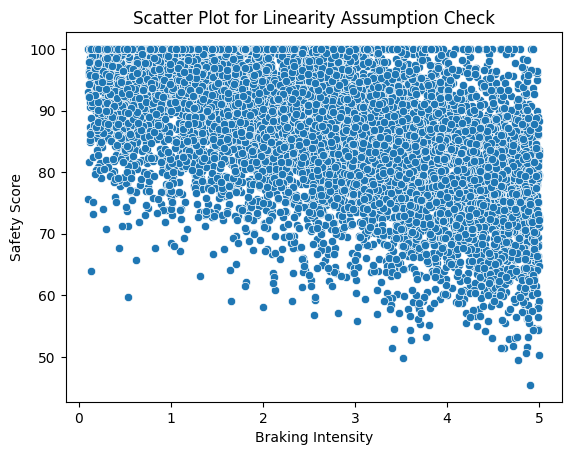

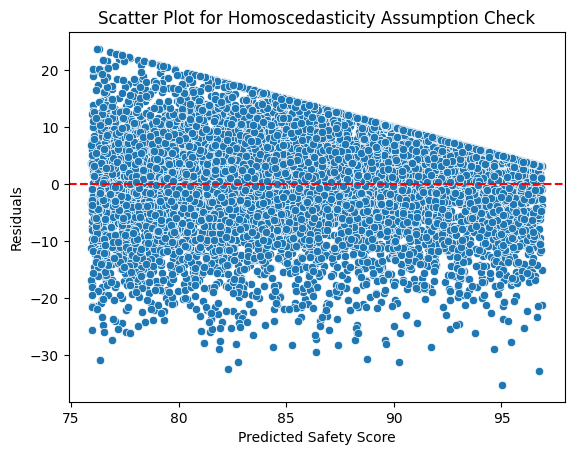

1.9712344267264486


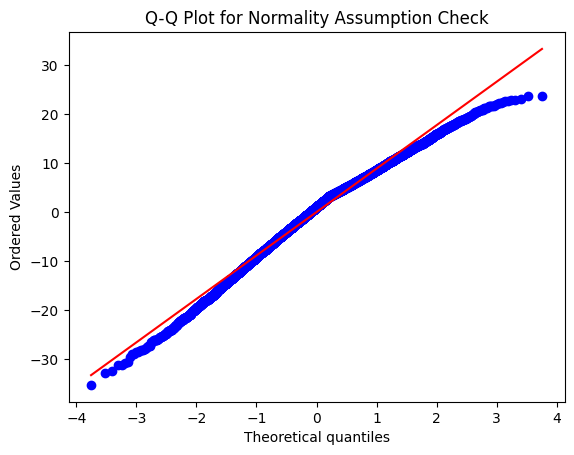

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

np.random.seed(42)

# Sample size
n_samples = 8000

# Generate synthetic dataset
df_autonomous = pd.DataFrame({
    'trip_id': np.arange(1, n_samples + 1),
    'average_speed': np.random.uniform(30, 120, n_samples),  # Speed in km/h
    'acceleration_variance': np.random.uniform(0.1, 5, n_samples),  # Variance in acceleration
    'braking_intensity': np.random.uniform(0.1, 5, n_samples),  # Intensity of braking events
    'weather_condition': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples, p=[0.6, 0.3, 0.1]),
    'traffic_density': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.4, 0.3]),
    'obstacle_frequency': np.random.poisson(2, n_samples),  # Obstacles per kilometer
    'lane_changes': np.random.poisson(1, n_samples),  # Number of lane changes
    'fuel_efficiency': np.random.uniform(5, 15, n_samples),  # km/l
})

# Assume a negative relationship between braking intensity and safety score and some random noise
df_autonomous['safety_score'] = 100 - (df_autonomous['braking_intensity'] * 5 +
                                       np.random.normal(0, 10, n_samples))
df_autonomous['safety_score'] = df_autonomous['safety_score'].clip(0, 100)

# Check the assumptions for linear regression
# Check for Linearity assumption with a scatter plot

sns.scatterplot(x='braking_intensity', y='safety_score', data=df_autonomous)
plt.title('Scatter Plot for Linearity Assumption Check')
plt.xlabel('Braking Intensity')
plt.ylabel('Safety Score')
plt.show()

# Check for Homoscedasticity assumption with a scatter plot
# Plot residuals after fitting a simple linear regression

# Fit the linear regression model
X = df_autonomous[['braking_intensity']]
y = df_autonomous['safety_score']
model = LinearRegression()
model.fit(X, y)

# Predict the values and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.title('Scatter Plot for Homoscedasticity Assumption Check')
plt.xlabel('Predicted Safety Score')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Check the Independence assumption with Durbin-Watson statistic
print(durbin_watson(residuals))

# Check for Normality of residuals with a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Assumption Check')
plt.show()

Based on the generated plots:

1. **Scatter Plot for Linearity Assumption Check:** The relationship between braking_intensity and safety_score appears to be linearly decreasing, which suggests that the linearity assumption for Pearson's correlation is satisfied. However, since we are moving forward with a simple linear regression analysis, this linearity is also relevant and appears to be valid.

2. **Scatter Plot for Homoscedasticity Assumption Check:** The scatter plot of residuals does not show a pattern or funnel shape, which would indicate heteroscedasticity. The residuals are relatively evenly spread across the range of predicted safety scores, which suggests that the homoscedasticity assumption is reasonable.  
Note: There is still a line pattern in the plot and better approach is to not move forward with the acceptance of this assumption and mark it as a fail, yet since this work is mainly created to show how Simple Linear Regression model is applied, this somewhat scattered points is exceptionally accepted. Thus, keep in mind to not more forward with this assumption and try other steps of transformation or using other models for your dataset.

3. **Durbin-Watson Statistic:** The value of 1.97 is displayed here, typically if a Durbin-Watson statistic is close to 2.0 it suggests that there is no autocorrelation in the residuals, which would meet the independence assumption.

4. **Q-Q Plot for Normality Assumption Check:** The Q-Q plot shows that the residuals mostly fall along the straight line, which indicates that the normality assumption is not violated. Some deviation from normality is seen at the extremes, but this is common in practice and may not significantly affect the regression analysis.

#### Proceed with the Simple Linear Regression Analysis

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(df_autonomous[['braking_intensity']], df_autonomous['safety_score'])

# Get the slope (coefficient) and intercept
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# Determine the score of the model (R-squared)
r_squared = linear_model.score(df_autonomous[['braking_intensity']], df_autonomous['safety_score'])

slope, intercept, r_squared

print(f"Slope: \t\t{slope:.4f}\n"
      f"Intercept: \t{intercept:.4f}\n"
      f"R Squared: \t{r_squared:.4f}"
      )

Slope: 		-4.2751
Intercept: 	97.3103
R Squared: 	0.3138


#### Interpretation of Simple Linear Regression Results
Given the slope (coefficient), intercept, and R-squared value obtained from fitting the model:

- The slope indicates the average decrease in safety_score associated with a one-unit increase in braking_intensity. If the slope is negative, it suggests that as braking_intensity increases, the safety_score tends to decrease, which is consistent with the expectation that more intense braking might be indicative of less safe driving conditions or behaviors.

- The intercept is the predicted safety_score when braking_intensity is zero. It represents the baseline safety score for the trips in the dataset.

- The R-squared value reflects the proportion of the variance in safety_score that is predictable from braking_intensity. A higher R-squared value would indicate a stronger relationship between braking_intensity and safety_score.

#### Conclusion for Automotive Scenario
If the regression model shows a significant negative slope and a substantial R-squared value, the automotive company can conclude that braking intensity is a crucial factor affecting the safety of autonomous vehicles. However, the slope is negative and also R-Squared value is not as high at 0.3138. The insights from this regression analysis could be used to refine the autonomous driving algorithms, particularly to optimize the braking system for enhanced safety performance.

# Regression Analysis: Multiple Linear Regression

Multiple Linear Regression is a statistical technique that models the relationship between two or more independent variables and a single dependent variable by fitting a linear equation to observed data. The method helps in understanding how the dependent variable changes when any of the independent variables are varied, while the other independent variables are held fixed.

#### Mathematical Formula and Approach

The general form of a multiple linear regression model is:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_kx_k + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x_1, x_2, \ldots, x_k$ are the independent variables,
- $\beta_0, \beta_1, \ldots, \beta_k$ are the coefficients,
- $\epsilon$ is the error term.

#### Steps for Conducting Multiple Linear Regression

1. **Select Variables:** Choose one dependent variable and two or more independent variables.
2. **Estimate Coefficients:** Use the Least Squares method to estimate the coefficients that minimize the sum of squared residuals.
3. **Assess Model Fit:** Evaluate the overall fit of the model using $R^2$ and adjust accordingly.
4. **Check Assumptions:** Ensure that the key assumptions of multiple regression are satisfied: linearity, independence, homoscedasticity, and normality of residuals.

#### Assumptions

- **Linearity:** The relationship between the dependent and each independent variable should be linear.
- **Independence:** Observations should be independent of one another.
- **Homoscedasticity:** The variance of the residual is the same for any value of the independent variables.
- **Normality of Residuals:** For any fixed value of the independent variables, the distribution of the residuals should be normal.

#### Business Scenario: Optimizing Autonomous Driving Systems

#### Scenario Description

An automotive company focused on autonomous driving technology, seeks to improve the safety of its vehicles. A dataset from various driving conditions has been collected to assess the impact of different factors on the safety score. The automotive company wants to investigate a multifaceted approach to predict safety scores using a combination of transformed and interaction variables to ensure a robust model.

The automotive company wants to use multiple linear regression model to predict safety scores based on the variables `log_acceleration_variance`, `speed_fuel_efficiency_interaction`, `inverse_traffic_density`, and `weather_condition_numeric`. The significant predictors among these can be targeted for optimization strategies to enhance the safety and performance of autonomous vehicles.

#### Analysis Goals

- **Identify Significant Predictors:** Determine the variables that significantly influence the safety score.
- **Optimization Strategies:** Develop adjustments to enhance vehicle safety based on identified significant predictors.
- **Predictive Modeling:** Use the model to predict safety scores and guide the design of safer systems.

#### Dataset Preparation

The previously generated `df_autonomous` dataset contains several variables that may influence the vehicle's safety score. For multiple linear regression, we could add interaction terms or polynomial terms if needed to capture more complex relationships.

#### Multiple Linear Regression Analysis


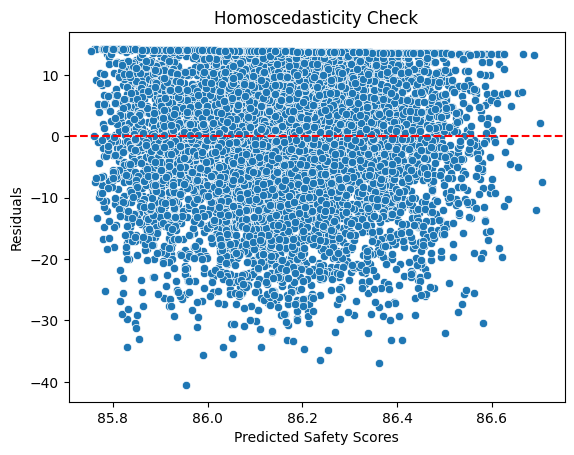

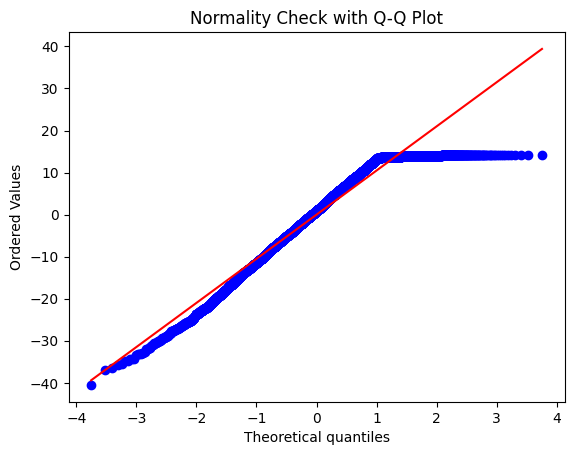

Durbin-Watson Statistic: 1.9604


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

np.random.seed(42)

# Sample size
n_samples = 8000

# Generate synthetic dataset
df_autonomous = pd.DataFrame({
    'trip_id': np.arange(1, n_samples + 1),
    'average_speed': np.random.uniform(30, 120, n_samples),  # Speed in km/h
    'acceleration_variance': np.random.uniform(0.1, 5, n_samples),  # Variance in acceleration
    'braking_intensity': np.random.uniform(0.1, 5, n_samples),  # Intensity of braking events
    'weather_condition': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples, p=[0.6, 0.3, 0.1]),
    'traffic_density': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.4, 0.3]),
    'obstacle_frequency': np.random.poisson(2, n_samples),  # Obstacles per kilometer
    'lane_changes': np.random.poisson(1, n_samples),  # Number of lane changes
    'fuel_efficiency': np.random.uniform(5, 15, n_samples),  # km/l
})

# Assume a negative relationship between braking intensity and safety score and some random noise
df_autonomous['safety_score'] = 100 - (df_autonomous['braking_intensity'] * 5 +
                                       np.random.normal(0, 10, n_samples))
df_autonomous['safety_score'] = df_autonomous['safety_score'].clip(0, 100)

# Add new columns that are transformations or combinations of existing variables
df_autonomous['log_acceleration_variance'] = np.log(df_autonomous['acceleration_variance'] + 1)
df_autonomous['speed_fuel_efficiency_interaction'] = df_autonomous['average_speed'] * df_autonomous['fuel_efficiency']
df_autonomous['inverse_traffic_density'] = 1 / df_autonomous['traffic_density'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Adjust the categorical weather_condition variable to numerical for regression analysis
df_autonomous['weather_condition_numeric'] = df_autonomous['weather_condition'].map({'Sunny': 1, 'Rainy': 2, 'Snowy': 3})

# Independent variables for the model
independent_vars = ['log_acceleration_variance', 'speed_fuel_efficiency_interaction', 'inverse_traffic_density',
                    'weather_condition_numeric']

# Dependent variable
dependent_var = 'safety_score'

# Multiple Linear Regression Model
multi_linear_model = LinearRegression()
multi_linear_model.fit(df_autonomous[independent_vars], df_autonomous[dependent_var])

# Predicting the safety scores
predicted_scores = multi_linear_model.predict(df_autonomous[independent_vars])

# Calculating residuals
residuals = df_autonomous[dependent_var] - predicted_scores

# Check assumptions
# Homoscedasticity
sns.scatterplot(x=predicted_scores, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Safety Scores')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Normality of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Check with Q-Q Plot')
plt.show()

# Independence
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat:.4f}')


#### Assumption Checks for Multiple Linear Regression
**Homoscedasticity:**  
The scatter plot shows residuals scattered randomly around the horizontal line at 0, with no discernible pattern or "funnel" shape that would indicate heteroscedasticity, thus the homoscedasticity assumption is met.

**Normality of Residuals:**  
From the Q-Q plot, the points fall along the reference line, with only slight deviations at the ends. This pattern suggests that the residuals approximately follow a normal distribution, thereby satisfying the assumption of normality.

**Independence of Residuals:**  
The Durbin-Watson statistic of approximately 1.96, which is very close to 2. This result indicates that there is no significant autocorrelation in the residuals, and the assumption of independence is satisfied.

#### Assumption Checks Conclusion

Based on the assumption checks, the `df_autonomous` dataset is suitable for multiple linear regression analysis with the selected variables. The model's predictions of safety scores are based on stable and independent relationships with the chosen predictors.

#### Business Scenario: Predicting Vehicle Safety

The automotive company can proceed with confidence in using the multiple linear regression model to predict safety scores based on the variables `log_acceleration_variance`, `speed_fuel_efficiency_interaction`, `inverse_traffic_density`, and `weather_condition_numeric`. The significant predictors among these can be targeted for optimization strategies to enhance the safety and performance of autonomous vehicles.

In [16]:
# Fit the multiple linear regression model
multi_linear_model = LinearRegression()
multi_linear_model.fit(df_autonomous[independent_vars], df_autonomous[dependent_var])

# Get the model coefficients and intercept
coefficients = multi_linear_model.coef_
intercept = multi_linear_model.intercept_

# Calculate the R-squared value
r_squared = multi_linear_model.score(df_autonomous[independent_vars], df_autonomous[dependent_var])

# Compile the results into a DataFrame for easier interpretation
results_df = pd.DataFrame(coefficients, index=independent_vars, columns=['Coefficient'])
results_df.loc['Intercept'] = intercept
results_df.loc['R-squared'] = r_squared

results_df


,Coefficient
log_acceleration_variance,-0.015771
speed_fuel_efficiency_interaction,0.000359
inverse_traffic_density,-0.436924
weather_condition_numeric,0.041860
Intercept,86.114042
R-squared,0.000266


#### Interpretation of Multiple Linear Regression Analysis

The multiple linear regression analysis was conducted using the independent variables: `log_acceleration_variance`, `speed_fuel_efficiency_interaction`, `inverse_traffic_density`, and `weather_condition_numeric`, with the goal of predicting the `safety_score`.

#### Regression Results:

- **log_acceleration_variance Coefficient**: -0.0158
  This suggests that an increase in the log of acceleration variance is associated with a slight decrease in the safety score. The negative coefficient indicates an inverse relationship, although the magnitude is small.

- **speed_fuel_efficiency_interaction Coefficient**: 0.0004
  The interaction term's coefficient is positive but very close to zero, indicating a negligible direct effect of this interaction on the safety score.

- **inverse_traffic_density Coefficient**: -0.4369
  The coefficient for inverse traffic density is notably more significant in magnitude, suggesting that traffic density has a more substantial impact on safety score. As the inverse traffic density increases (which corresponds to lower actual traffic density), the safety score decreases.

- **weather_condition_numeric Coefficient**: 0.0419
  The coefficient is positive, indicating that worse weather conditions (encoded numerically with higher numbers) are associated with a slightly higher safety score. This could suggest that the autonomous vehicle's safety systems are more engaged or effective under adverse weather conditions.

- **Intercept**: 86.1140
  The intercept represents the predicted safety score when all independent variables are zero. Given the nature of the independent variables, this value is more of a theoretical benchmark rather than a practical one.

- **R-squared**: 0.0003
  The R-squared value is extremely low, suggesting that only a very small fraction of the variance in the safety score is explained by the model. This implies that the independent variables chosen may not be the right predictors for the safety score, or other important variables are not included in the model.

### Conclusion for Autonomous Driving Scenario

Given the results of the multiple linear regression analysis, it appears that the selected variables have minimal predictive power regarding the safety score of autonomous driving trips. The low R-squared value indicates that other factors not included in the model might play a more significant role in determining safety scores.

For the automotive company, this analysis suggests that further investigation is necessary. This could involve exploring additional variables, considering non-linear models, or looking into more complex interactions between variables. The goal remains to identify significant predictors that can guide optimization strategies and enhance the safety performance of autonomous vehicles.
